In [0]:
from google.colab import files
uploaded = files.upload()

Saving s3.mat to s3.mat


# **Importing required modules**

In [0]:
import scipy.io
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from scipy import signal
from scipy.signal import welch
from scipy.fftpack import fft

# **Loading the .mat EEG signal files**

In [4]:
mat = scipy.io.loadmat('s3.mat')
print(mat)
mat_s = mat['s3']

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Dec 01 07:18:12 2014', '__version__': '1.0', '__globals__': [], 's3': array([[(array([[ 0.00000000e+00,  3.90625000e-03,  7.81250000e-03, ...,
         2.41652344e+02,  2.41656250e+02,  2.41660156e+02],
       [ 1.86125961e+00,  8.24754000e+00,  1.80727841e+01, ...,
        -1.89324043e+01, -1.94352401e+01, -2.07030338e+01],
       [ 6.55585370e-01,  3.02152739e+00,  6.90836874e+00, ...,
        -2.33521642e+01, -2.42006834e+01, -2.66475719e+01],
       ...,
       [ 5.95301658e-01,  2.59758633e+00,  5.58860056e+00, ...,
        -7.95990284e+00, -7.70485132e+00, -8.52990734e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]), array([[ 0.00000000e+00,  3.90625000e-03,  7.81250000e-03, ...,
         2.07886719e+02,  

# **Normal Data visualization with the mat files**

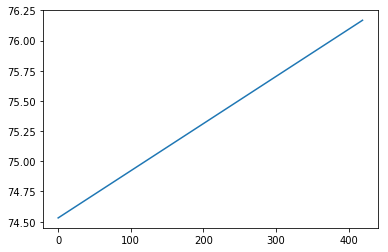

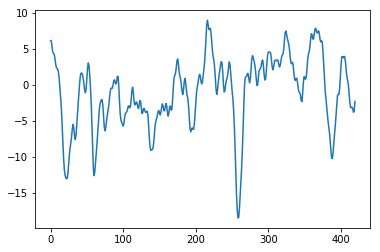

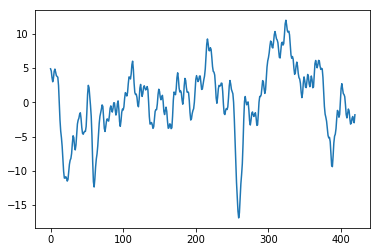

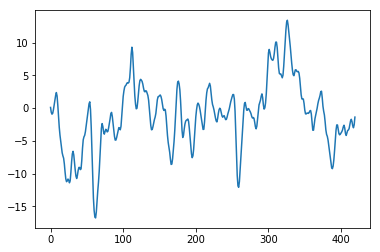

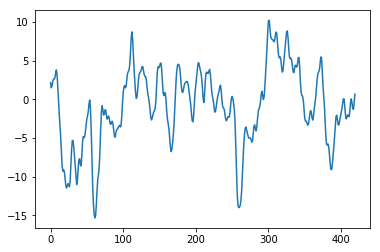

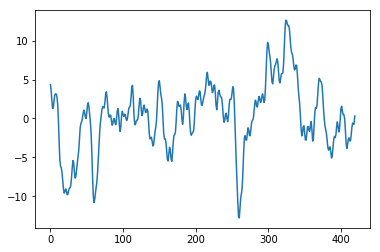

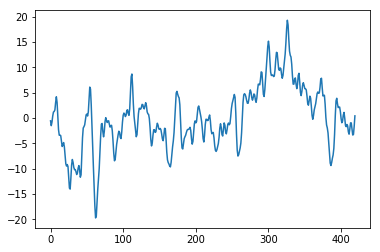

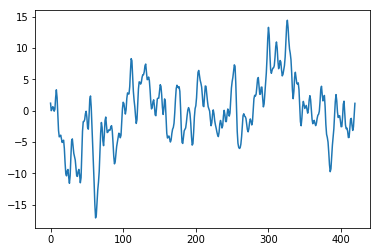

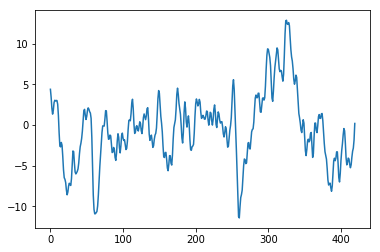

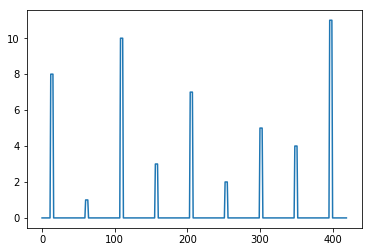

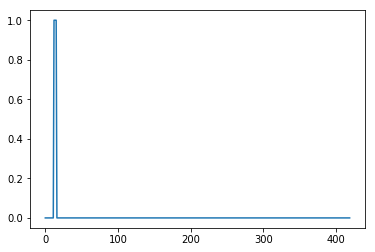

In [5]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(11):
  newdata = np.squeeze(mat_s[0,0]['train'][i][19080:19500])
  plt.plot(newdata)
  plt.show()

# **P300 signals for different EEG channels with noise remoal using Savgol filter**

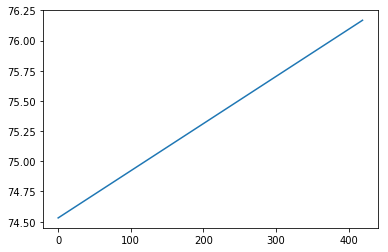

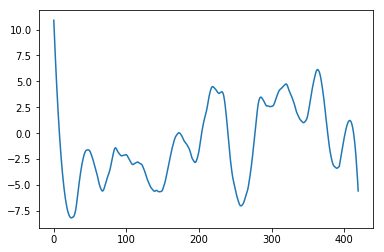

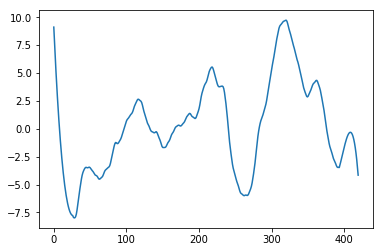

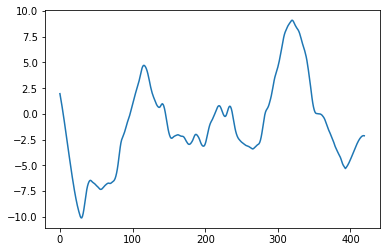

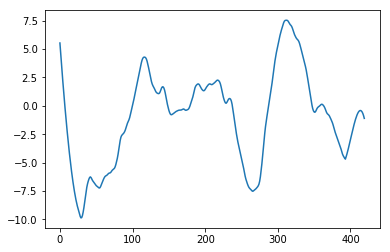

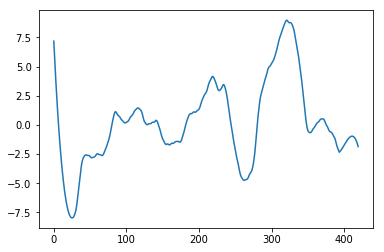

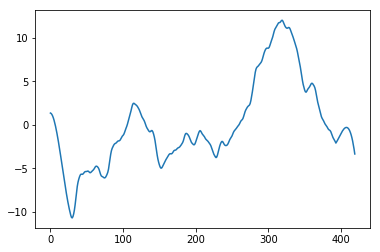

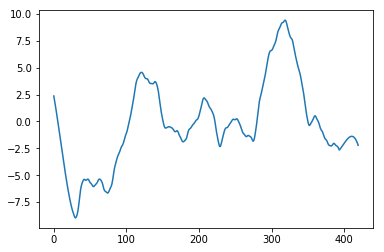

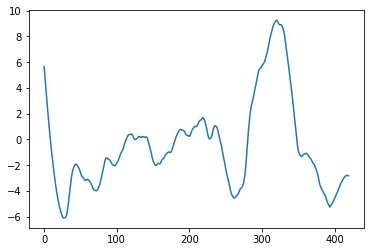

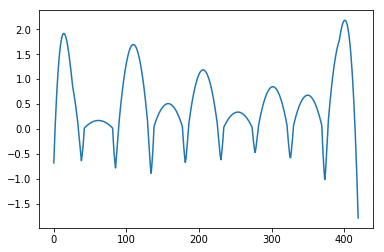

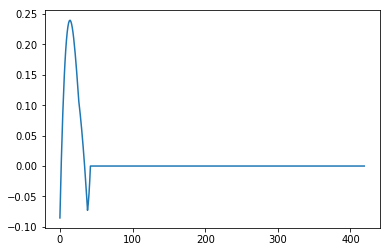

In [6]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

for i in range(11):
  newdata = signal.savgol_filter(np.squeeze(mat_s[0,0]['train'][i][19080:19500]), 53, 3) 
  plt.plot(newdata)
  plt.show()

# **Fast Fourier Transform for a particular P300 signal range**

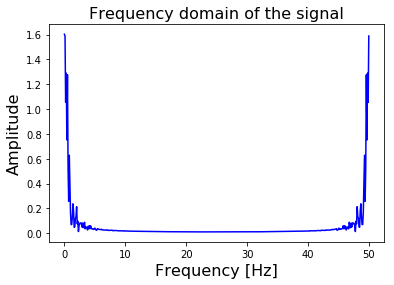

In [7]:
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values
 
t_n = 10
N = 1000
T = t_n / N
f_s = 1/T
 
f_values, fft_values = get_fft_values(signal.savgol_filter(np.squeeze(mat_s[0,0]['train'][3][19080:19580]), 53, 3), T, N, f_s)
 
plt.plot(f_values, fft_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of the signal", fontsize=16)
plt.show()

# **Power Spectrum Density determination with Welch algorithm**

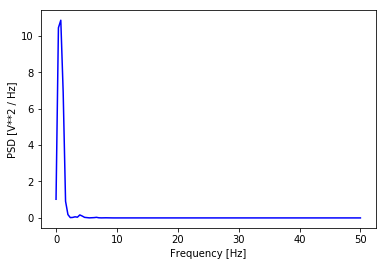

In [9]:
from scipy.signal import welch
 
def get_psd_values(y_values, T, N, f_s):
    f_values, psd_values = welch(y_values, fs=f_s)
    return f_values, psd_values
 
 
t_n = 10
N = 1000
T = t_n / N
f_s = 1/T
 
f_values, psd_values = get_psd_values(signal.savgol_filter(np.squeeze(mat_s[0,0]['train'][3][19080:19580]), 53, 3), T, N, f_s)
 
plt.plot(f_values, psd_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2 / Hz]')
plt.show()

# **Autocorrelation**

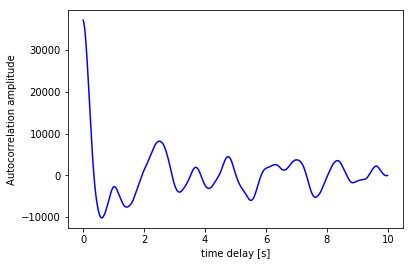

In [10]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result)//2:]
 
def get_autocorr_values(y_values, T, N, f_s):
    autocorr_values = autocorr(y_values)
    x_values = np.array([T * jj for jj in range(0, N)])
    return x_values, autocorr_values
 
t_n = 10
N = 1000
T = t_n / N
f_s = 1/T
 
t_values, autocorr_values = get_autocorr_values(signal.savgol_filter(np.squeeze(mat_s[0,0]['train'][3][19080:20080]), 53, 3), T, N, f_s)
 
plt.plot(t_values, autocorr_values, linestyle='-', color='blue')
plt.xlabel('time delay [s]')
plt.ylabel('Autocorrelation amplitude')
plt.show()

# **P300 signal determination for different persons in different EEG channels**

In [11]:
#Uploading s3.mat
from google.colab import files
uploaded = files.upload()

mat = scipy.io.loadmat('s3.mat')
mat_s = mat['s3']

new_data = np.squeeze(mat_s[0,0]['train'][10]) # Target - non-target array
new_data_2 = np.squeeze(mat_s[0,0]['train'][2]) # channel 3

p300_target = [] #This array is considered for the target stimulus position fixation in Channel no. 11
p300_main_sig = [] # P300 signal data value from the time of occurrance of target stimulus to the generation of P300

#Calculating where the target (value = 1) stimulus has been provided in the signal profile
for indx in range(len(new_data)):
  if (int(new_data[indx]) == 1 and int(new_data[indx-1]) == 0):
    p300_target.append(indx)

for i in p300_target:
  for j in range(360):
    p300_main_sig.append(new_data_2[i + j]) #This array will contain P300 data points
  #Please comment this for loop in case we want a specific P300
  for j in range(1000):
    p300_main_sig.append(0) #Adding pause in-between for easy identification of various P300; 

#Total P300 signals for a definite channel (In this case channel 3) has been coagulated in the array: p300_main_sig
